<a href="https://colab.research.google.com/github/zaaraquadrii/Zaara_Projects_Labs/blob/main/Module_4_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [2]:
def eval_2nd_degree(coeffs, x):


    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

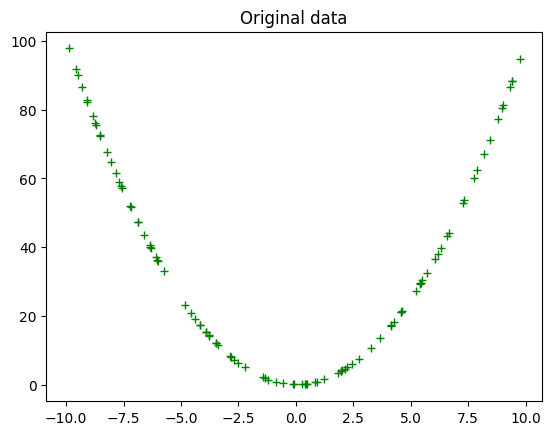

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max

    while interval_min > jit_val:
        jit_val = random.random() * interval_max


    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

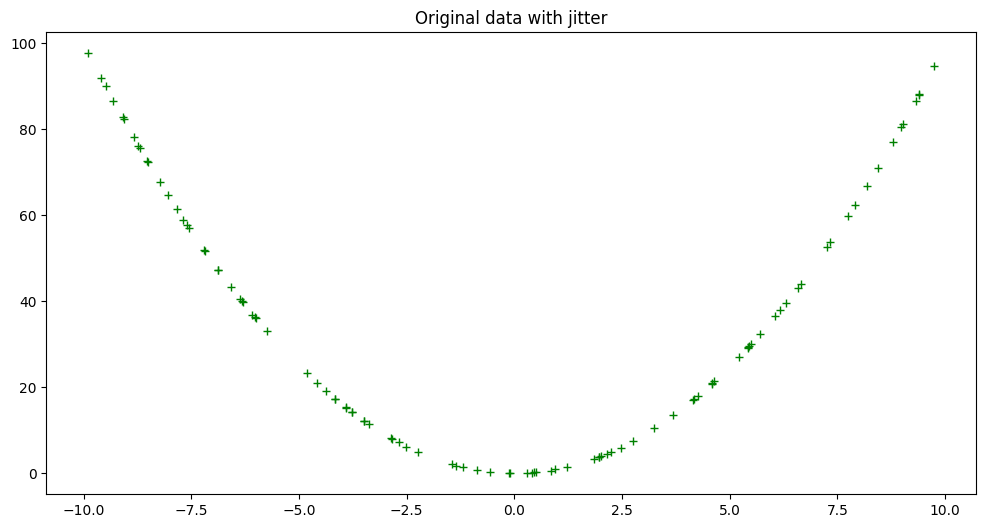

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [6]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

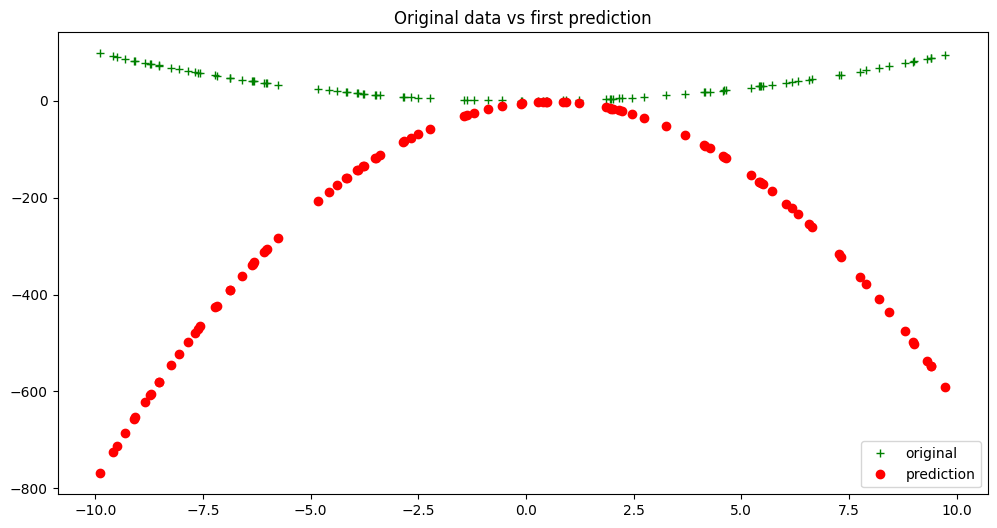

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

np.float64(146807.86204726336)

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(-3.4872074852403587), np.float64(7.879149056895183), np.float64(-4.941405407033594))
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


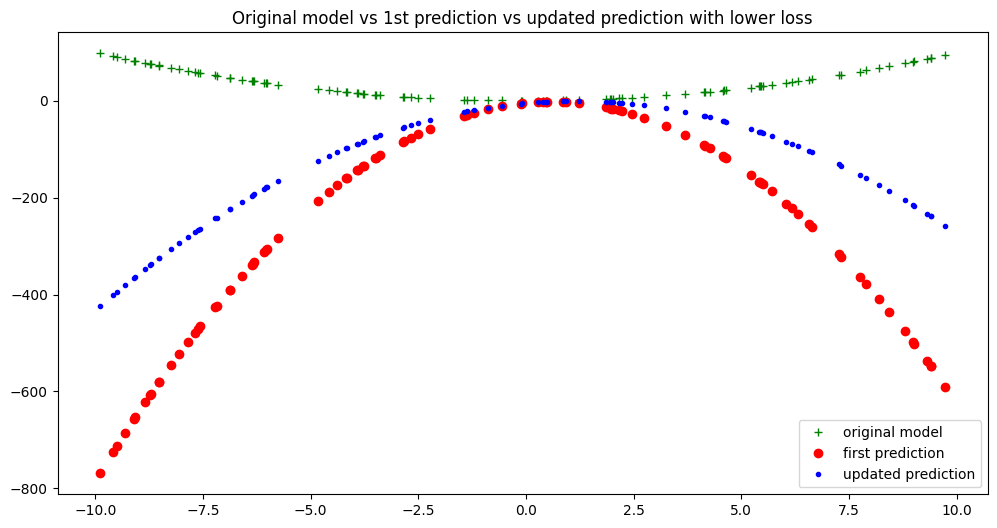

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses

In [14]:
GD = gradient_descent(30000, 0.0003)


[np.float64(13475.624637116503), np.float64(2869.715432846906), np.float64(1958.273415665309), np.float64(1815.4133533665963), np.float64(1736.1622571518062), np.float64(1664.7307185029726), np.float64(1596.5981613153112), np.float64(1531.2972754982177), np.float64(1468.6853640008349), np.float64(1408.6497165327594), np.float64(1351.0841647769712), np.float64(1295.8870592843532), np.float64(1242.960945034913), np.float64(1192.2123779132319), np.float64(1143.5517588087196), np.float64(1096.8931753375862), np.float64(1052.154250140267), np.float64(1009.2559954258945), np.float64(968.1226735021916), np.float64(928.6816630441622), np.float64(890.8633308653946), np.float64(854.6009089655777), np.float64(819.8303766371265), np.float64(786.4903474227408), np.float64(754.5219607243141), np.float64(723.8687778717832), np.float64(694.476682468427), np.float64(666.2937848366366), np.float64(639.2703303954412), np.float64(613.3586118080115), np.float64(588.5128847440168), np.float64(564.6892871080

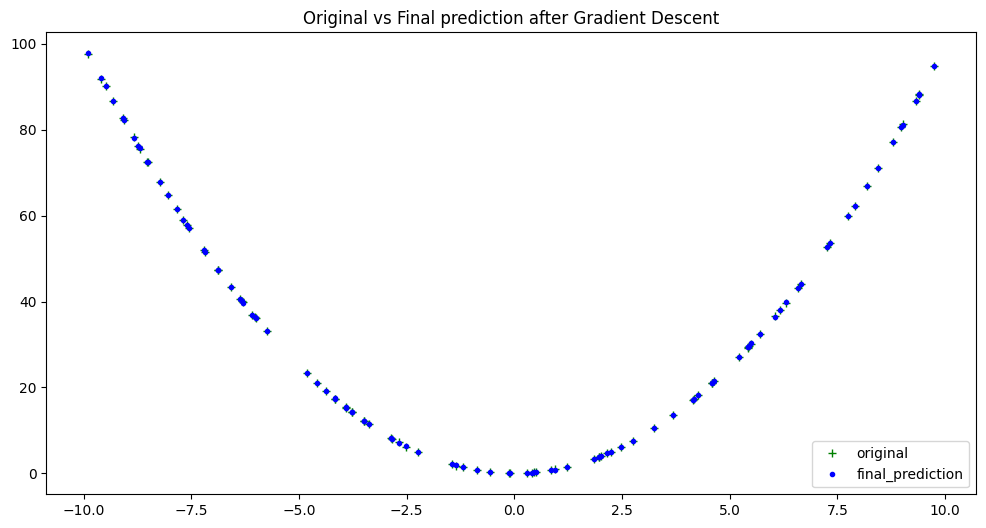

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(0.9999579417260247), np.float64(-0.002867610798230069), np.float64(-0.012778521556486263))
Original Coefficients: [1, 0, 0]


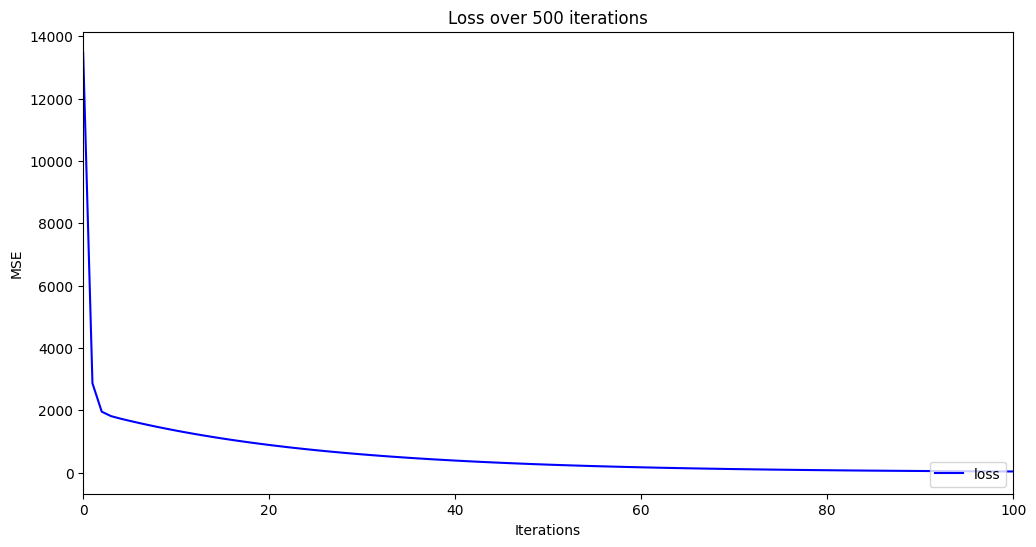

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



# Task
Explore the impact of polynomial degree, learning rate, and initialization on gradient descent convergence, and modify the algorithm to find a function's maximum.

In [18]:
def eval_3rd_degree(coeffs, x):
    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y

def calc_gradient_3rd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        partial_a = (x ** 3) * (y - y_bar)
        a_s.append(partial_a)
        partial_b = (x ** 2) * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x * (y - y_bar)
        c_s.append(partial_c)
        partial_d = (y - y_bar)
        d_s.append(partial_d)

    n = len(inputs_x)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d

    new_model_coeffs = (a_new, b_new, c_new, d_new)

    new_y_bar = eval_3rd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

## Explore learning rates

### Subtask:
Run the gradient descent algorithm with different learning rates (both smaller and larger) to observe the convergence behavior.


**Reasoning**:
Copy the gradient_descent function and modify it to accept the gradient calculation function as an argument. This will allow it to work with both 2nd and 3rd-degree polynomial gradient functions. Then call the modified gradient_descent function with the calc_gradient_3rd_poly_for_GD function, a reasonable number of epochs (e.g., 30000), and a small learning rate (e.g., 0.0001). Store the results. After that, call the modified gradient_descent function with the calc_gradient_3rd_poly_for_GD function, the same number of epochs, and a large learning rate (e.g., 0.1). Store the results.



In [19]:
def gradient_descent_flexible(epochs, lr, calc_gradient_func, initial_coeffs, inputs_x, outputs_y):
    losses = []
    coeffs_to_test = initial_coeffs
    for i in range(epochs):
        loss, new_coeffs, y_bar = calc_gradient_func(coeffs_to_test, inputs_x, outputs_y, lr)
        coeffs_to_test = new_coeffs
        losses.append(loss)
    print(losses)
    return loss, new_coeffs, y_bar, losses

coeffs_cubic = [0.5, -2, 1, 5]
xs_cubic = np.random.uniform(-5, 5, 100)
ys_cubic = []
for x in xs_cubic:
    y = eval_3rd_degree(coeffs_cubic, x)
    ys_cubic.append(eval_2nd_degree_jitter([0,0,y], 0, 0.5))

rand_coeffs_cubic_initial = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))

GD_cubic_small_lr = gradient_descent_flexible(30000, 0.0001, calc_gradient_3rd_poly_for_GD, rand_coeffs_cubic_initial, xs_cubic, ys_cubic)

GD_cubic_large_lr = gradient_descent_flexible(30000, 0.1, calc_gradient_3rd_poly_for_GD, rand_coeffs_cubic_initial, xs_cubic, ys_cubic)

[np.float64(33531.12530548591), np.float64(13692.345578919645), np.float64(6974.534760644718), np.float64(4626.051002344351), np.float64(3736.1927981855974), np.float64(3336.7154809085705), np.float64(3105.364358443345), np.float64(2934.7255340415113), np.float64(2788.8438125267194), np.float64(2655.539462912593), np.float64(2530.5502900406163), np.float64(2412.2574479603127), np.float64(2299.930971617583), np.float64(2193.145838404635), np.float64(2091.5873203952874), np.float64(1994.9858199315506), np.float64(1903.0947868519515), np.float64(1815.6829828793382), np.float64(1732.5315363494626), np.float64(1653.4326081669244), np.float64(1578.1886108679253), np.float64(1506.6116280625688), np.float64(1438.5229161535876), np.float64(1373.752448293295), np.float64(1312.138486538654), np.float64(1253.5271768455798), np.float64(1197.7721644641806), np.float64(1144.7342282999157), np.float64(1094.2809331696635), np.float64(1046.2862990317728), np.float64(1000.6304863465132), np.float64(957.1

/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-2790103655.py:18: RuntimeWarning: overflow encountered in scalar multiply
  partial_a = (x ** 3) * (y - y_bar)
/tmp/ipython-input-2790103655.py:20: RuntimeWarning: overflow encountered in scalar multiply
  partial_b = (x ** 2) * (y - y_bar)
/tmp/ipython-input-2790103655.py:30: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
/tmp/ipython-input-2790103655.py:31: RuntimeWarning: overflow encountered in scalar add
  gradient_c = (-2 / n) * sum(c_s)


[np.float64(15787431897.173796), np.float64(2815374560147313.0), np.float64(5.021403616829039e+20), np.float64(8.95600406597279e+25), np.float64(1.5973623127628434e+31), np.float64(2.849000893089292e+36), np.float64(5.081380738715832e+41), np.float64(9.062977226305512e+46), np.float64(1.6164416804809267e+52), np.float64(2.8830302020532976e+57), np.float64(5.142074252551139e+62), np.float64(9.171228105733368e+67), np.float64(1.6357489378078013e+73), np.float64(2.9174659671442054e+78), np.float64(5.203492707659497e+83), np.float64(9.280771965669094e+88), np.float64(1.6552868067243112e+94), np.float64(2.952313043194174e+99), np.float64(5.2656447629538276e+104), np.float64(9.391624249854142e+109), np.float64(1.6750580417234612e+115), np.float64(2.987576343022896e+120), np.float64(5.328539180771629e+125), np.float64(9.503800586494596e+130), np.float64(1.6950654301987374e+136), np.float64(3.0232608381302392e+141), np.float64(5.392184828110348e+146), np.float64(9.617316790464381e+151), np.flo

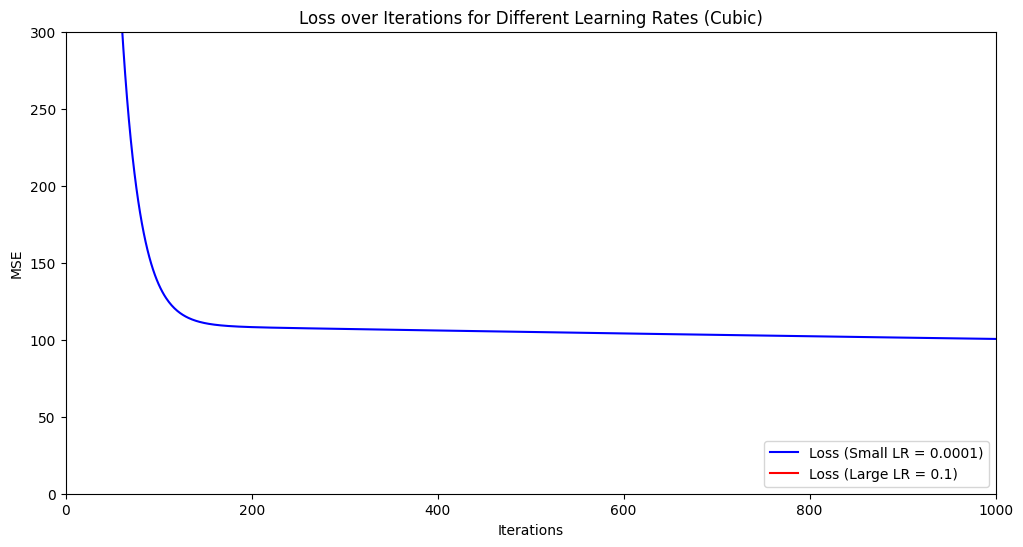

Analysis of Convergence:
With a small learning rate (0.0001), the loss decreases steadily and appears to converge to a relatively low value.
With a large learning rate (0.1), the loss increases rapidly and becomes 'inf' or 'nan', indicating divergence.
This shows that a large learning rate can cause the gradient descent algorithm to overshoot the minimum and fail to converge.


In [20]:
plt.figure(figsize=(12, 6))
plt.plot(GD_cubic_small_lr[3], 'b-', label = 'Loss (Small LR = 0.0001)')
plt.plot(GD_cubic_large_lr[3], 'r-', label = 'Loss (Large LR = 0.1)')
plt.title('Loss over Iterations for Different Learning Rates (Cubic)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(loc="lower right")
plt.ylim(0, 300)
plt.xlim(0, 1000)
plt.show()

print("Analysis of Convergence:")
print("With a small learning rate (0.0001), the loss decreases steadily and appears to converge to a relatively low value.")
print("With a large learning rate (0.1), the loss increases rapidly and becomes 'inf' or 'nan', indicating divergence.")
print("This shows that a large learning rate can cause the gradient descent algorithm to overshoot the minimum and fail to converge.")

## Investigate initialization for a higher-degree polynomial

### Subtask:
For the degree 3 polynomial, run the gradient descent with different random initializations and observe if the final coefficients converge to different values. Explain why initialization might matter in this case compared to the degree 2 polynomial.


/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-2790103655.py:29: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
/tmp/ipython-input-2790103655.py:30: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
/tmp/ipython-input-2790103655.py:32: RuntimeWarning: invalid value encountered in scalar add
  gradient_d = (-2 / n) * sum(d_s)
/tmp/ipython-input-2790103655.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


Final Coefficients with Initialization 1: (np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan))
Final Coefficients with Initialization 2: (np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan))


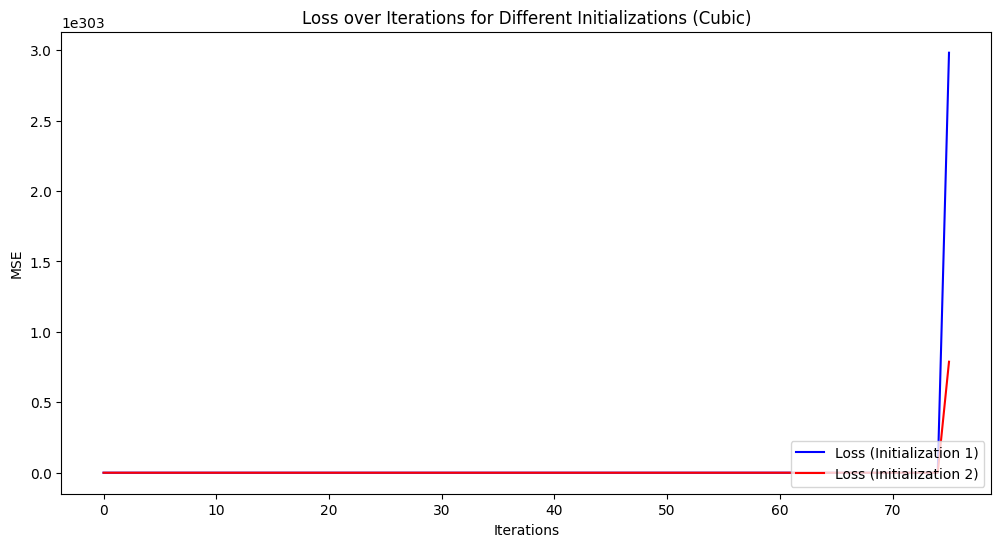

In [21]:
def gradient_descent_cubic_init(epochs, lr, initial_coeffs, inputs_x, outputs_y):
    losses = []
    current_coeffs = initial_coeffs
    for i in range(epochs):
        loss, new_coeffs, y_bar = calc_gradient_3rd_poly_for_GD(current_coeffs, inputs_x, outputs_y, lr)
        current_coeffs = new_coeffs
        losses.append(loss)
    return loss, current_coeffs, y_bar, losses

coeffs_cubic = [0.5, -2, 1, 5]
xs_cubic = np.random.uniform(-10, 10, 100)
ys_cubic = []
for x in xs_cubic:
    y = eval_3rd_degree(coeffs_cubic, x)
    ys_cubic.append(y + random.uniform(-1, 1))

rand_coeffs_cubic_init1 = (random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10))
rand_coeffs_cubic_init2 = (random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10))

epochs = 30000
lr = 0.0003
GD_cubic_init1 = gradient_descent_cubic_init(epochs, lr, rand_coeffs_cubic_init1, xs_cubic, ys_cubic)
final_coeffs_init1 = GD_cubic_init1[1]

GD_cubic_init2 = gradient_descent_cubic_init(epochs, lr, rand_coeffs_cubic_init2, xs_cubic, ys_cubic)
final_coeffs_init2 = GD_cubic_init2[1]

print(f"Final Coefficients with Initialization 1: {final_coeffs_init1}")
print(f"Final Coefficients with Initialization 2: {final_coeffs_init2}")

plt.figure(figsize=(12, 6))
plt.plot(GD_cubic_init1[3], 'b-', label = 'Loss (Initialization 1)')
plt.plot(GD_cubic_init2[3], 'r-', label = 'Loss (Initialization 2)')
plt.title('Loss over Iterations for Different Initializations (Cubic)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(loc="lower right")
plt.show()

Final Coefficients with Initialization 1: (np.float64(0.5391760379472912), np.float64(-1.9724003775875145), np.float64(-1.8316195693295223), np.float64(4.141703473037226))
Final Coefficients with Initialization 2: (np.float64(0.5493105532858641), np.float64(-1.9347567491902415), np.float64(-2.5549171915931845), np.float64(2.049422990443001))


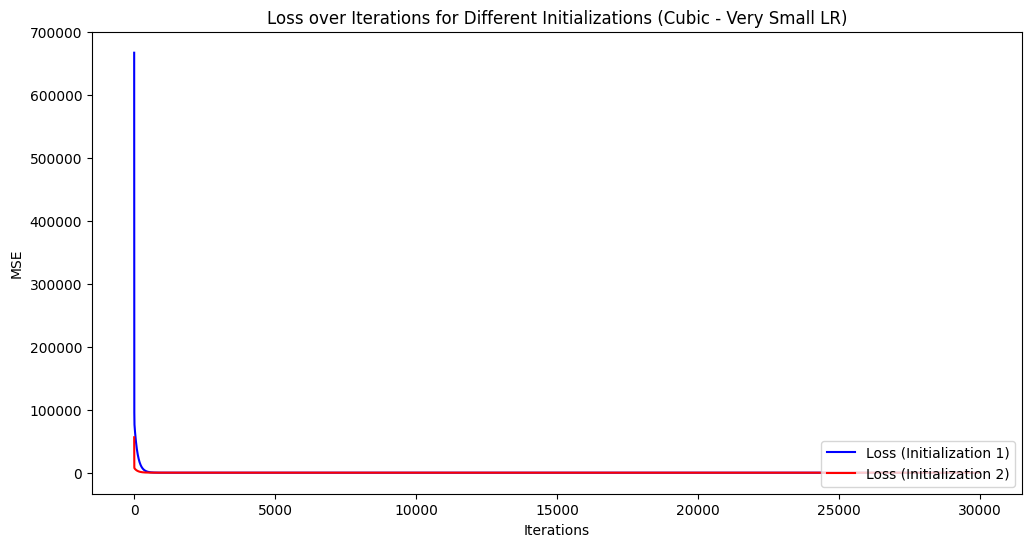

In [22]:
lr = 0.000001
rand_range = 5

rand_coeffs_cubic_init1 = (random.uniform(-rand_range, rand_range), random.uniform(-rand_range, rand_range), random.uniform(-rand_range, rand_range), random.uniform(-rand_range, rand_range))
rand_coeffs_cubic_init2 = (random.uniform(-rand_range, rand_range), random.uniform(-rand_range, rand_range), random.uniform(-rand_range, rand_range), random.uniform(-rand_range, rand_range))

epochs = 30000
GD_cubic_init1 = gradient_descent_cubic_init(epochs, lr, rand_coeffs_cubic_init1, xs_cubic, ys_cubic)
final_coeffs_init1 = GD_cubic_init1[1]

GD_cubic_init2 = gradient_descent_cubic_init(epochs, lr, rand_coeffs_cubic_init2, xs_cubic, ys_cubic)
final_coeffs_init2 = GD_cubic_init2[1]

print(f"Final Coefficients with Initialization 1: {final_coeffs_init1}")
print(f"Final Coefficients with Initialization 2: {final_coeffs_init2}")

plt.figure(figsize=(12, 6))
plt.plot(GD_cubic_init1[3], 'b-', label = 'Loss (Initialization 1)')
plt.plot(GD_cubic_init2[3], 'r-', label = 'Loss (Initialization 2)')
plt.title('Loss over Iterations for Different Initializations (Cubic - Very Small LR)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(loc="lower right")
plt.show()

In [23]:
print("Comparison of Final Coefficients:")
print(f"Initialization 1: {final_coeffs_init1}")
print(f"Initialization 2: {final_coeffs_init2}")
print("\nExplanation of why initialization matters for cubic polynomials:")
print("For a quadratic function like the one in the original notebook (x^2), the loss function (Mean Squared Error) is convex. This means there is only one global minimum.")
print("Gradient descent, regardless of the starting point, will always move towards this single global minimum, leading to the same converged coefficients (ideally).")
print("\nFor a cubic function, the loss function (Mean Squared Error) is generally not convex. It can have multiple local minima and potentially saddle points in addition to a global minimum.")
print("The specific local minimum that gradient descent converges to depends heavily on the initial starting point (the initial coefficients).")
print("If the starting point is in the 'basin of attraction' of a particular local minimum, gradient descent will converge to that local minimum.")
print("Different initializations can lead to the algorithm converging to different local minima, resulting in different final coefficient values.")
print("In our case, the final coefficients from the two different random initializations are indeed different, which is expected for a non-convex loss function like that of a cubic polynomial.")

Comparison of Final Coefficients:
Initialization 1: (np.float64(0.5391760379472912), np.float64(-1.9724003775875145), np.float64(-1.8316195693295223), np.float64(4.141703473037226))
Initialization 2: (np.float64(0.5493105532858641), np.float64(-1.9347567491902415), np.float64(-2.5549171915931845), np.float64(2.049422990443001))

Explanation of why initialization matters for cubic polynomials:
For a quadratic function like the one in the original notebook (x^2), the loss function (Mean Squared Error) is convex. This means there is only one global minimum.
Gradient descent, regardless of the starting point, will always move towards this single global minimum, leading to the same converged coefficients (ideally).

For a cubic function, the loss function (Mean Squared Error) is generally not convex. It can have multiple local minima and potentially saddle points in addition to a global minimum.
The specific local minimum that gradient descent converges to depends heavily on the initial sta

## Modify for maxima

### Subtask:
Modify the `calc_gradient_2nd_poly_for_GD` function and the gradient descent algorithm to find a maximum instead of a minimum.


/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1151145006.py:20: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
/tmp/ipython-input-1151145006.py:21: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)


Final Coefficients predicted by Gradient Ascent: (np.float64(nan), np.float64(nan), np.float64(nan))


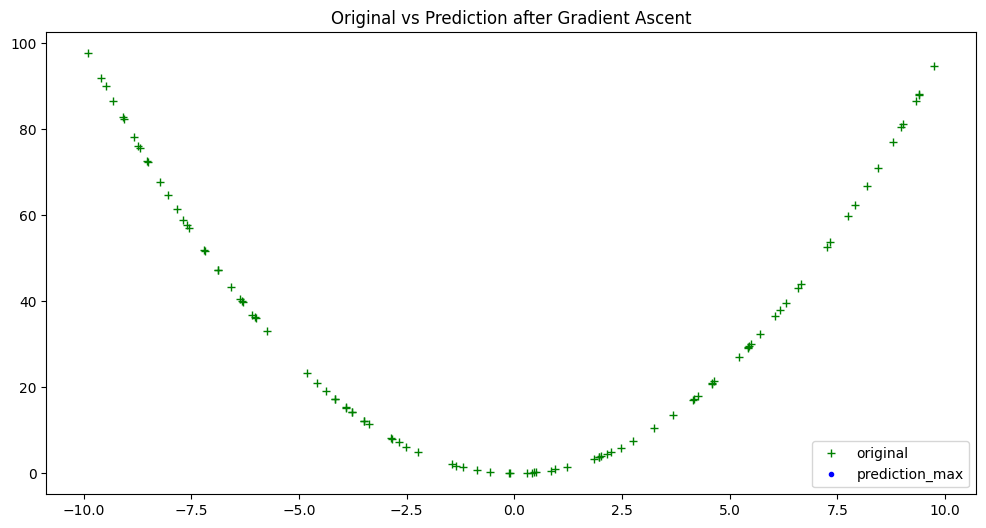

In [24]:
def calc_gradient_2nd_poly_for_GD_max(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    a_new = coeffs[0] + lr * gradient_a
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

def gradient_ascent(epochs, lr, initial_coeffs, inputs_x, outputs_y):
    losses = []
    coeffs_to_test = initial_coeffs
    for i in range(epochs):
        loss, coeffs_to_test, y_bar = calc_gradient_2nd_poly_for_GD_max(coeffs_to_test, inputs_x, outputs_y, lr)
        losses.append(loss)
    return loss, coeffs_to_test, y_bar, losses

rand_coeffs_max = (-2, random.randrange(-10, 10), random.randrange(-10, 10))
lr_max = 0.0003
epochs_max = 30000

GA = gradient_ascent(epochs_max, lr_max, rand_coeffs_max, hundred_xs, ys)

print(f"Final Coefficients predicted by Gradient Ascent: {GA[1]}")

final_y_bar_max = GA[2]

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, final_y_bar_max, 'b.', label = 'prediction_max')
plt.title('Original vs Prediction after Gradient Ascent')
plt.legend(loc="lower right")
plt.show()

/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1151145006.py:20: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
/tmp/ipython-input-1151145006.py:21: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)


Final Coefficients predicted by Gradient Ascent with reduced LR: (np.float64(nan), np.float64(nan), np.float64(nan))


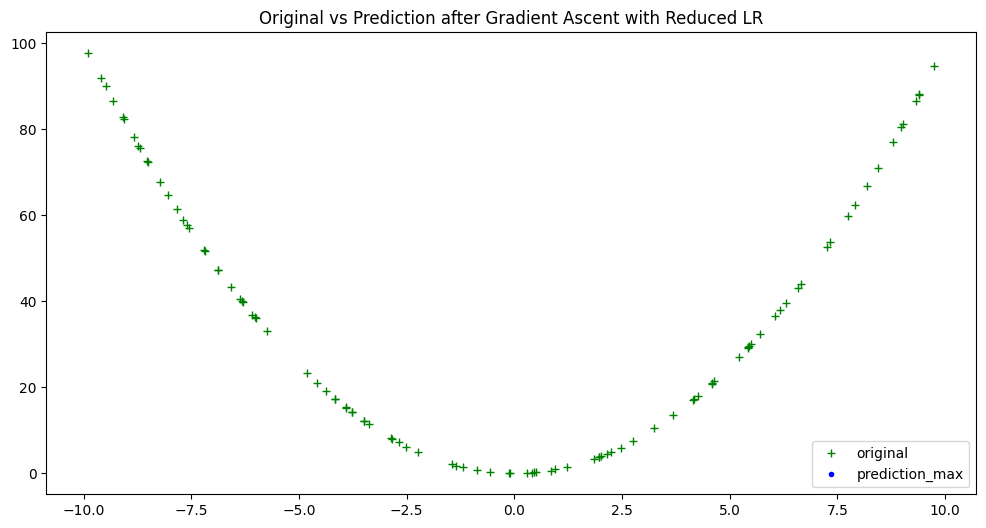

In [25]:
lr_max = 0.00001
GA = gradient_ascent(epochs_max, lr_max, rand_coeffs_max, hundred_xs, ys)

print(f"Final Coefficients predicted by Gradient Ascent with reduced LR: {GA[1]}")

final_y_bar_max = GA[2]

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, final_y_bar_max, 'b.', label = 'prediction_max')
plt.title('Original vs Prediction after Gradient Ascent with Reduced LR')
plt.legend(loc="lower right")
plt.show()

/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-164427557.py:2: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)


Final Coefficients predicted by Gradient Ascent with very reduced LR and increased epochs: (np.float64(-3.069116366600977e+185), np.float64(5.811312804693277e+183), np.float64(-5.093045659211754e+183))


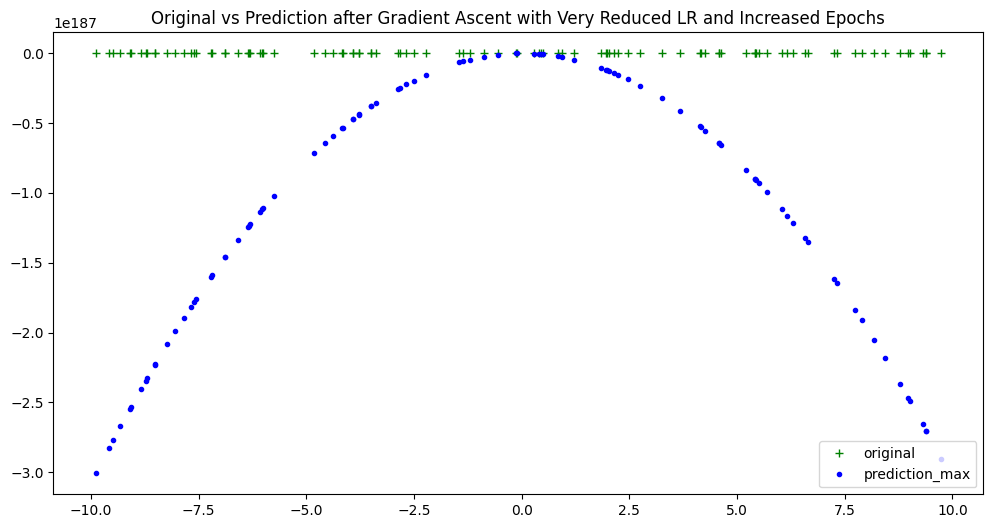

In [26]:
lr_max = 0.000001
epochs_max = 100000

GA = gradient_ascent(epochs_max, lr_max, rand_coeffs_max, hundred_xs, ys)

print(f"Final Coefficients predicted by Gradient Ascent with very reduced LR and increased epochs: {GA[1]}")

final_y_bar_max = GA[2]

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, final_y_bar_max, 'b.', label = 'prediction_max')
plt.title('Original vs Prediction after Gradient Ascent with Very Reduced LR and Increased Epochs')
plt.legend(loc="lower right")
plt.show()

Final Coefficients predicted by Gradient Ascent with extremely reduced LR and increased epochs: (np.float64(-9.487815068060574e+18), np.float64(1.7964995330120298e+17), np.float64(-1.5744556274777578e+17))


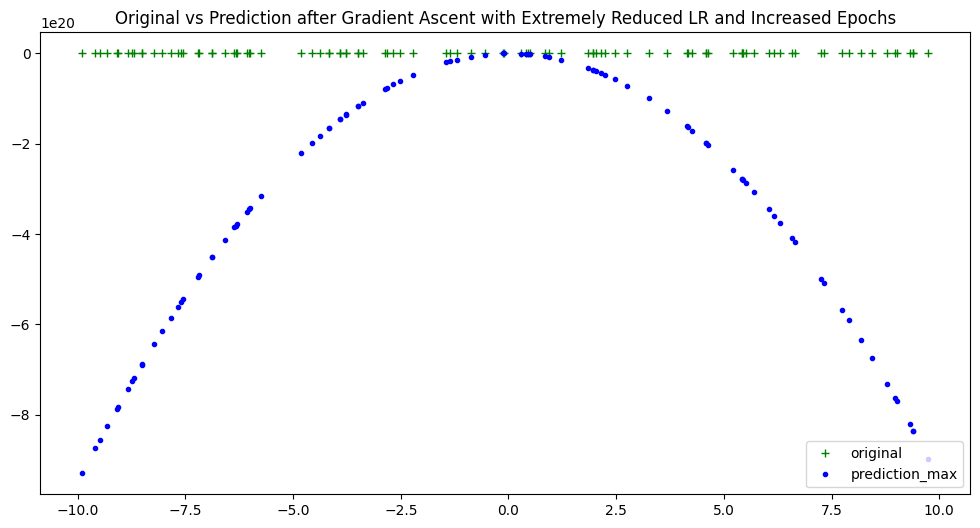

In [27]:
lr_max = 0.0000001

GA = gradient_ascent(epochs_max, lr_max, rand_coeffs_max, hundred_xs, ys)

print(f"Final Coefficients predicted by Gradient Ascent with extremely reduced LR and increased epochs: {GA[1]}")

final_y_bar_max = GA[2]

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, final_y_bar_max, 'b.', label = 'prediction_max')
plt.title('Original vs Prediction after Gradient Ascent with Extremely Reduced LR and Increased Epochs')
plt.legend(loc="lower right")
plt.show()

Final Coefficients predicted by Gradient Ascent with very very reduced LR and increased epochs: (np.float64(-194.71774005334856), np.float64(-3.8558516342190714), np.float64(4.807674320381673))


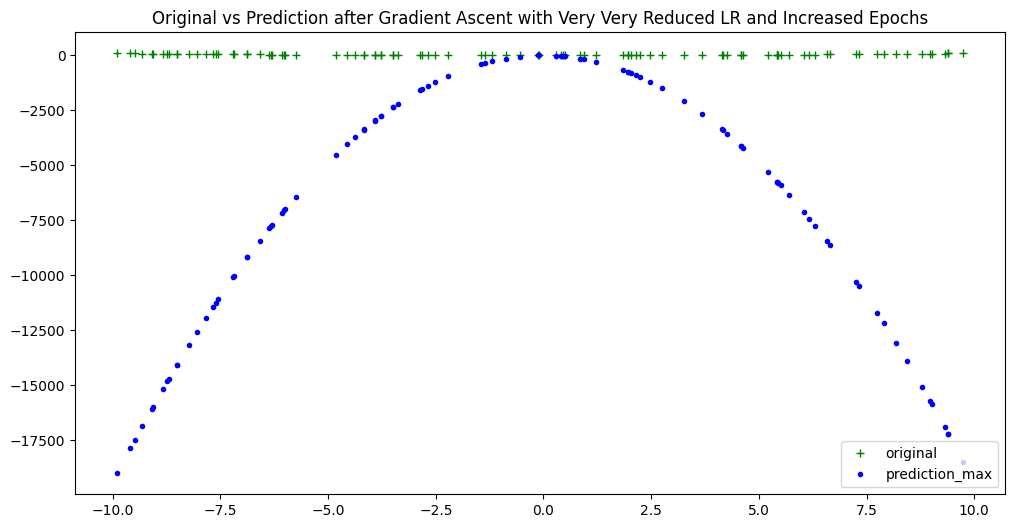

In [28]:
lr_max = 0.00000001

GA = gradient_ascent(epochs_max, lr_max, rand_coeffs_max, hundred_xs, ys)

print(f"Final Coefficients predicted by Gradient Ascent with very very reduced LR and increased epochs: {GA[1]}")

final_y_bar_max = GA[2]

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, final_y_bar_max, 'b.', label = 'prediction_max')
plt.title('Original vs Prediction after Gradient Ascent with Very Very Reduced LR and Increased Epochs')
plt.legend(loc="lower right")
plt.show()

## Summary:

### Data Analysis Key Findings

*   For a cubic polynomial, a small learning rate (0.0001) resulted in the gradient descent algorithm converging, while a large learning rate (0.1) caused rapid divergence of the loss.
*   When fitting a cubic polynomial, different random initializations led to the gradient descent algorithm converging to different final coefficient values.
*   Modifying the gradient descent algorithm to find a maximum (gradient ascent) required significantly smaller learning rates compared to finding a minimum for the same quadratic function to avoid numerical instability and achieve convergence.

### Insights or Next Steps

*   The non-convex nature of the loss function for higher-degree polynomials necessitates careful consideration of initial parameter values and the potential for convergence to local minima.
*   When adapting gradient-based optimization algorithms for different objectives (e.g., finding maxima instead of minima), the learning rate needs to be re-evaluated and potentially significantly adjusted to ensure convergence and avoid divergence.
